# Proyek Analisis Data: PRSA_Data_Changping_20130301-20170228
- **Nama:** Abdillah Husein Sanjani
- **Email:** abdillahhuseinsanjani1999@gmail.com
- **ID Dicoding:** abdillah husein sanjani

## Menentukan Pertanyaan Bisnis

- Di antara tahun 2013 sampai 2017, pada tahun berapa konsentrasi rata-rata NO2 tertinggi dan terendah di Kota Changping?
- Pada bulan apa konsentrasi rata-rata NO2 tertinggi dan terendah di Kota Changping?
- Pukul berapakah konsentrasi rata-rata NO2 tertinggi dan terendah di Kota Changping?
- Apa faktor yang berkorelasi kuat dengan konsentrasi NO2 di Kota Changping?

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()
!conda --version

✨🍰✨ Everything looks OK!
conda 24.11.2


In [2]:
!conda create --name main-ds python=3.9

Channels:
 - conda-forge
Platform: linux-64
Solving environment: / - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.2
    latest version: 25.9.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local/envs/main-ds

  added / updated specs:
    - python=3.9


The following NEW packages will be INSTALLED:

  _libgcc_mutex      conda-forge/linux-64::_libgcc_mutex-0.1-conda_forge 
  _openmp_mutex      conda-forge/linux-64::_openmp_mutex-4.5-2_gnu 
  bzip2              conda-forge/linux-64::bzip2-1.0.8-hda65f42_8 
  ca-certificates    conda-forge/noarch::ca-certificates-2025.10.5-hbd8a1cb_0 
  ld_impl_linux-64   conda-forge/linux-64::ld_impl_linux-64-2.44-h1aa0949_4 
  libexpat           conda-forge/linux-64::libexpat-2.7.1-hecca717_0 
  libffi             conda-forge/linux-64::libffi-3.5.2-h9ec8514_0 
  libgcc             conda-forge/linux-64::libgcc-15.2.0-h767d6

In [3]:
!conda activate main-ds


CondaError: Run 'conda init' before 'conda activate'



In [4]:
!pip install numpy pandas scipy matplotlib seaborn jupyter

In [5]:
!mkdir proyek_analisis_data

mkdir: cannot create directory ‘proyek_analisis_data’: File exists


In [6]:
!cd proyek_analisis_data

In [7]:
!jupyter-notebook .

[C 2025-10-31 15:48:58.112 ServerApp] Bad config encountered during initialization: The 'login_handler_class' trait of <jupyter_server.serverapp.ServerApp object at 0x780c23348290> instance must be a type, but 'google.colab._login_handler.ColabLoginHandler' could not be imported


## Import Semua Packages/Library yang Digunakan

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import matplotlib.image as mpimg
import geopandas as gpd
from shapely.geometry import Point

## Data Wrangling

### Gathering Data

In [9]:
prsa_changping_df = pd.read_csv("/content/PRSA_Data_Changping_20130301-20170228.csv")
prsa_changping_df.head(15)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
5,6,2013,3,1,5,3.0,3.0,10.0,17.0,400.0,71.0,-4.5,1022.6,-19.5,0.0,NNW,1.7,Changping
6,7,2013,3,1,6,4.0,6.0,12.0,22.0,500.0,65.0,-4.5,1023.4,-19.5,0.0,NNW,1.8,Changping
7,8,2013,3,1,7,3.0,6.0,25.0,39.0,600.0,48.0,-2.1,1024.6,-20.0,0.0,NW,2.5,Changping
8,9,2013,3,1,8,9.0,25.0,13.0,42.0,700.0,46.0,-0.2,1025.2,-20.5,0.0,NNW,2.8,Changping
9,10,2013,3,1,9,11.0,29.0,5.0,18.0,500.0,73.0,0.6,1025.3,-20.4,0.0,NNW,3.8,Changping


**Insight:**
- Konsentrasi CO cenderung lebih tinggi pada pukul 5 sampai 9 di mana puncaknya pada pukul 8.
- Pada pukul 8, konsentrasi NO2 juga mencapai puncaknya.
- Pada pukul 8, konsentrasi pm2.5 naik cukup signifikan dari 3.0 ke 9.0. Hal tersebut juga selaras dengan konsentrasi pm10 yang naik signifikan dari 6.0 ke 25.0 dari sejam sebelumnya.


### Assessing Data

In [10]:
prsa_changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [11]:
prsa_changping_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,774
PM10,582
SO2,628
NO2,667
CO,1521


In [12]:
print("Jumlah duplikasi: ", prsa_changping_df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
prsa_changping_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


**Insight:**
- Jumlah data yang hilang(Missing Value) cukup banyak pada beberapa kolom(terutama pada kolom CO).
- Tidak ditemukan duplikasi data pada dataset.


### Cleaning Data

In [14]:
prsa_changping_df.head(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
5,6,2013,3,1,5,3.0,3.0,10.0,17.0,400.0,71.0,-4.5,1022.6,-19.5,0.0,NNW,1.7,Changping
6,7,2013,3,1,6,4.0,6.0,12.0,22.0,500.0,65.0,-4.5,1023.4,-19.5,0.0,NNW,1.8,Changping
7,8,2013,3,1,7,3.0,6.0,25.0,39.0,600.0,48.0,-2.1,1024.6,-20.0,0.0,NW,2.5,Changping
8,9,2013,3,1,8,9.0,25.0,13.0,42.0,700.0,46.0,-0.2,1025.2,-20.5,0.0,NNW,2.8,Changping
9,10,2013,3,1,9,11.0,29.0,5.0,18.0,500.0,73.0,0.6,1025.3,-20.4,0.0,NNW,3.8,Changping


In [15]:
# Pada kolom PM2.5, PM10, SO2, NO2, CO, dan O3, digunakan teknik interpolasi linear karena data tersebut saling berkesinambungan
prsa_changping_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']] = prsa_changping_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear')

In [16]:
# Pada kolom TEMP, PRES, DEWP, WSPM, digunakan teknik interpolasi linear karena data tersebut saling berkesinambungan
prsa_changping_df[['TEMP', 'PRES', 'DEWP', 'WSPM']] = prsa_changping_df[['TEMP', 'PRES', 'DEWP', 'WSPM']].interpolate(method='linear')

In [17]:
prsa_changping_df.RAIN.value_counts()

,count
RAIN,
0.0,33663
0.1,287
0.2,146
0.3,122
0.5,79
...,...
20.1,1
9.5,1
7.0,1


In [18]:
prsa_changping_df.wd.value_counts()

,count
wd,
NNW,4776
NW,3838
N,3777
WNW,2877
ESE,2786
E,2427
NNE,1919
SSE,1853
SE,1823


In [19]:
# Pada kolom RAIN dan wd, digunakan teknik imputasi dengan Mode (yang paling sering muncul). Hal tersebut karena pada kolom wd termasuk data kategoris. Adapun pada kolom RAIN yang memuat parameter hujan, dapat dilihat bahwa jarang terjadi hujan atau bernilai 0.0
prsa_changping_df['RAIN'] = prsa_changping_df['RAIN'].fillna(prsa_changping_df['RAIN'].mode()[0])
prsa_changping_df['wd'] = prsa_changping_df['wd'].fillna(prsa_changping_df['wd'].mode()[0])

In [20]:
prsa_changping_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [21]:
prsa_changping_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,70.986438,94.788575,14.943066,44.206153,1156.990246,57.976253,13.671605,1007.771151,1.486924,0.060278,1.854871
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.397726,83.928515,21.012174,29.502709,1122.612745,54.258719,11.367457,10.226075,13.828895,0.752355,1.310748
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,16.000000,3.400000,999.300000,-10.300000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.600000,1007.400000,1.700000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.000000,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


**Insight:**
- Data yang hilang (Missing Value) pada beberapa kolom sudah diisi menggunakan teknik interpolasi linier dan imputasi dengan Mode.
- Pada beberapa kolom, terjadi perubahan pada mean dan standar deviasi karena data Missing Value sudah terisi.

In [22]:
prsa_changping_df.to_csv("main_data.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore prsa_changping_df

In [23]:
prsa_changping_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,Changping
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4916,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,70.986438,94.788575,14.943066,44.206153,1156.990246,57.976253,13.671605,1007.771151,1.486924,0.060278,NaN,1.854871,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.397726,83.928515,21.012174,29.502709,1122.612745,54.258719,11.367457,10.226075,13.828895,0.752355,NaN,1.310748,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,16.000000,3.400000,999.300000,-10.300000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.600000,1007.400000,1.700000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.000000,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,NaN,2.300000,NaN


In [24]:
prsa_changping_df.sample(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
33012,33013,2016,12,5,12,3.0,65.0,4.0,23.0,500.0,41.0,4.2,1021.1,-16.2,0.0,WNW,6.8,Changping
11605,11606,2014,6,27,13,11.0,11.0,2.0,21.0,200.0,106.0,34.6,997.2,7.6,0.0,NNW,3.0,Changping
11778,11779,2014,7,4,18,179.0,242.0,2.0,32.0,1400.0,236.0,29.4,996.3,22.6,0.0,SSW,2.5,Changping
28304,28305,2016,5,23,8,74.0,130.0,12.0,110.0,1100.0,8.0,20.6,1002.9,10.7,0.0,WNW,1.3,Changping
9319,9320,2014,3,24,7,191.0,206.0,34.0,68.0,2000.0,18.0,8.0,1007.3,0.2,0.0,NW,0.9,Changping
30124,30125,2016,8,7,4,11.0,11.0,2.0,4.0,400.0,56.0,23.9,997.2,22.0,0.2,N,2.4,Changping
1532,1533,2013,5,3,20,98.0,112.0,18.0,31.0,700.0,155.0,18.9,1007.3,6.4,0.0,ESE,1.3,Changping
15293,15294,2014,11,28,5,43.0,80.0,18.0,56.0,1000.0,2.0,1.8,1011.0,-4.5,0.0,NNW,1.3,Changping
21416,21417,2015,8,10,8,36.0,36.0,2.0,36.0,400.0,58.0,28.3,1002.4,17.2,0.0,E,0.7,Changping
26957,26958,2016,3,28,5,16.0,85.0,5.0,65.0,600.0,9.0,7.2,1003.1,-8.8,0.0,NW,0.6,Changping


In [25]:
# Rata-rata PM2.5, PM10, SO2, NO2, CO, dan O3 dari tahun 2013 sampai 2017

prsa_changping_df.groupby(by="year").agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean"
})

,PM2.5,PM10,SO2,NO2,CO,O3
year,,,,,,
2013,72.393246,91.176675,19.134785,40.960527,1022.978758,61.132385
2014,79.881998,107.611416,21.250228,45.968002,1229.971461,63.019235
2015,68.832608,93.275696,11.698721,42.725942,1162.431507,58.307374
2016,61.665699,86.632115,8.144126,45.541268,1129.764344,54.002618
2017,79.802966,94.150777,16.431497,51.014831,1535.769774,33.010593


In [26]:
# Rata-rata PM2.5, PM10, SO2, NO2, CO, dan O3 per bulan

prsa_changping_df.groupby(by='month').agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean"
})

,PM2.5,PM10,SO2,NO2,CO,O3
month,,,,,,
1,84.348757,104.949395,32.186660,57.565860,1935.181452,27.443448
2,81.794063,99.163532,29.815450,48.657817,1410.914454,37.097529
3,84.001428,130.078696,25.761494,55.263030,1246.935148,50.269165
4,70.376389,109.755556,11.528907,41.336468,769.916493,70.856717
5,60.602050,96.509173,11.956421,34.200588,687.768817,91.996174
6,59.516632,76.324201,6.960300,29.769862,801.410022,95.657328
7,62.473790,75.347278,4.862033,26.956316,815.864125,98.706707
8,46.796976,63.266297,4.367385,27.512412,728.175403,91.950336
9,55.301389,67.432812,4.894563,38.033167,852.359375,58.681267


In [27]:
# Rata-rata PM2.5, PM10, SO2, NO2, CO, dan O3 setiap bulan dari tahun 2013 sampai 2017

prsa_changping_df.groupby(by=["year",'month']).agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean"
})

PM2.5        PM10        SO2        NO2           CO  \
year month                                                              
2013 3       98.916667  123.430108  34.977695  59.389822  1386.262097   
     4       59.444444   90.161806  16.716323  36.718789   776.124306   
     5       82.982527  118.168011  23.327701  37.745094   776.693548   
     6       81.061111  102.316667  14.018699  31.729585  1091.112311   
     7       61.977151   64.951613   6.550281  24.684136   823.671554   
     8       55.350806   67.436156   7.047229  23.858521   783.938172   
     9       73.302778   82.976389   6.754640  41.941972   967.076389   
     10      82.489247   99.905242  12.535789  55.517531   962.701613   
     11      60.779167   81.325000  24.884737  47.651766  1102.291667   
     12      67.145161   80.840054  44.077830  50.180957  1554.905914   
2014 1       88.147177  110.272177  57.946909  56.318548  2293.615591   
     2      144.253720  150.312500  62.394345  60.231399  2166.592262   
     3       86.000000  127.849462  34.607527  53.670027  1308.064516   
     4      103.959028  142.120139  15.792361  49.172917   879.097222   
     5       53.945699  100.352823  12.308737  36.318548   744.354839   
     6       46.043750   60.495833   5.326389  31.391667   692.291667   
     7       76.969758  101.935484   5.544355  32.655242   878.830645   
     8       56.550134   75.973790   4.777823  35.984140   746.908602   
     9       60.418750   78.765972   5.346528  35.160833   913.263889   
     10     118.401210  138.271505   6.497984  56.986559  1260.685484   
     11      76.826944  118.809722  17.812639  56.530139  1502.847222   
     12      52.256048   89.334005  29.315188  48.201613  1433.669355   
2015 1       96.257930  114.706183  37.275538  63.211694  2050.336022   
     2       86.736607  116.953869  28.745536  44.521577  1418.824405   
     3       78.036626  143.992204  20.896909  47.599126  1151.075269   
     4       61.253472  100.211111   6.109028  36.102778   678.333333   
     5       54.556452   87.325269   6.018817  28.278898   636.491935   
     6       58.054861   75.135417   4.554861  24.233333   772.708333   
     7       56.084677   66.596102   4.264785  23.262097   604.569892   
     8       38.620968   57.033602   2.750000  22.390457   502.352151   
     9       42.927083   50.772917   4.153472  38.105556   736.319444   
     10      43.758737   61.579973   4.882392  48.393145   876.075269   
     11      90.539583   99.222222   7.538889  59.472917  1870.763889   
     12     120.169355  146.530242  14.055780  76.894489  2657.056452   
2016 1       54.682124   80.878360  16.430108  55.337366  1495.430108   
     2       38.419540   58.596264  13.023707  43.884339   943.893678   
     3       73.052419  125.043011  12.563844  60.393145  1142.338710   
     4       56.848611  106.529167   7.497917  43.351389   746.111111   
     5       50.923522   80.190591   6.170430  34.459812   593.534946   
     6       52.906806   67.348889   3.941250  31.724861   649.527778   
     7       54.863575   67.905914   3.088710  27.223790   956.384409   
     8       36.665995   52.621640   2.894489  27.816532   879.502688   
     9       44.556944   57.215972   3.323611  36.924306   792.777778   
     10      79.752016   96.279570   3.428495  53.518145  1166.061828   
     11      85.786111  119.687500  10.006528  61.882639  1797.777778   
     12     109.819220  125.616935  15.423387  69.604839  2364.650538   
2017 1       98.307796  113.940860  17.094086  55.395833  1901.344086   
     2       59.315476   72.240327  15.697917  46.164435  1131.026786   

                    O3  
year month              
2013 3       59.846282  
     4       67.423397  
     5       94.222195  
     6       82.689592  
     7       81.049275  
     8       90.407391  
     9       54.058819  
     10      29.795191  
     11      26.514037  
     12      24.871095  
2014 1       25.971102  
     2       26.008929  
     3       44.

In [28]:
# Rata-rata PM2.5, PM10, SO2, NO2, CO, dan O3 perjamnya

prsa_changping_df.groupby(by="hour").agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean"
})

,PM2.5,PM10,SO2,NO2,CO,O3
hour,,,,,,
0,72.773445,93.504031,12.499778,44.223048,1192.512561,48.207677
1,71.851758,90.399402,12.209829,41.949804,1211.916473,43.531114
2,69.746532,87.241966,14.505127,40.447517,1108.991842,38.617614
3,67.816985,83.696349,11.320927,40.506657,1116.952270,37.457724
4,65.354059,80.300447,11.232295,41.233214,1101.227209,34.623269
5,63.608997,78.645280,11.519847,42.875704,1119.547339,32.833848
6,63.131527,80.237318,12.003647,44.098762,1206.632432,31.757030
7,64.246298,86.160066,12.969895,47.403040,1251.408496,28.529818
8,67.134142,92.667394,15.120862,49.642814,1316.647176,29.142664


**Insight:**
- Konsentrasi rata-rata tertinggi NO2 pada tahun 2017 dan terendah pada tahun 2013.
- Konsentrasi rata-rata tertinggi NO2 pada bulan keduabelas atau Desember dan terendah pada bulan ketujuh atau Juli.
- Konsentrasi rata-rata tertinggi NO2 pada pukul 20.00 dan terendah pada pukul 14.00.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Di antara tahun 2013 sampai 2017, pada tahun berapa konsentrasi rata-rata NO2 tertinggi dan terendah di Kota Changping?

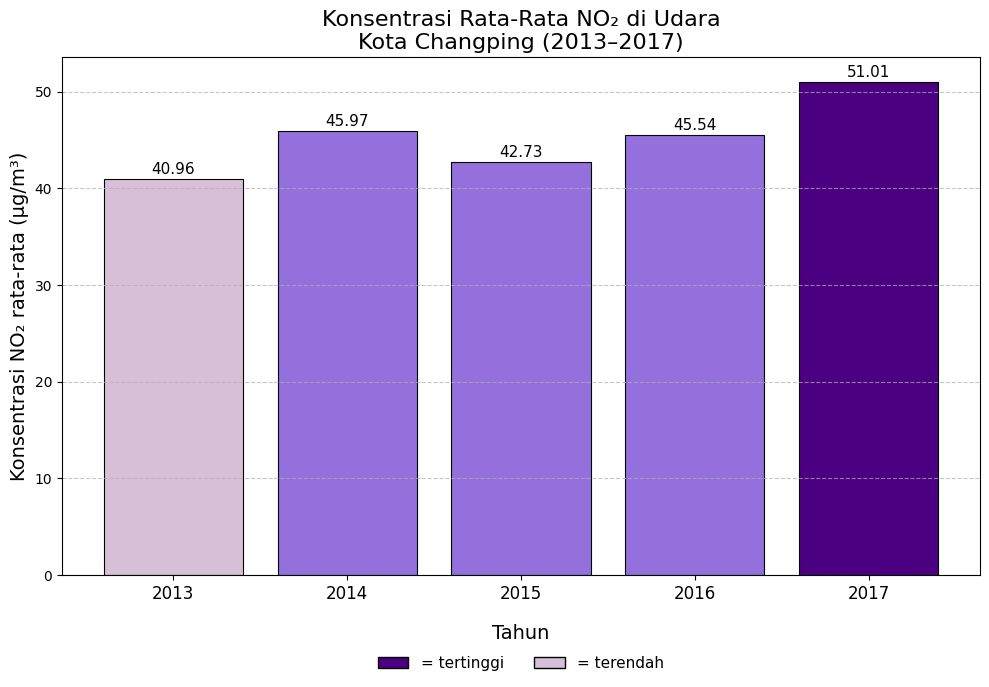

In [29]:
# Hitung rata-rata NO2 tiap tahun
yearly_no2 = prsa_changping_df.groupby('year')['NO2'].mean().round(2)

# Temukan tahun dengan konsentrasi tertinggi dan terendah
max_year = yearly_no2.idxmax()
min_year = yearly_no2.idxmin()
max_val = yearly_no2.max()
min_val = yearly_no2.min()

with plt.style.context('default'):
    # Tentukan warna batang
    colors = []
    for year in yearly_no2.index:
        if year == max_year:
            colors.append('#4B0082')  # ungu pekat (tertinggi)
        elif year == min_year:
            colors.append('#D8BFD8')  # ungu muda (terendah)
        else:
            colors.append('#9370DB')  # ungu sedang (lainnya)

    # Buat figure
    plt.figure(figsize=(10,7))
    bars = plt.bar(yearly_no2.index, yearly_no2.values, color=colors, edgecolor='black', linewidth=0.8)

    # Tambahkan label nilai di atas batang
    for i, val in enumerate(yearly_no2.values):
        plt.text(yearly_no2.index[i], val + 0.5, f'{val}', ha='center', fontsize=11)

    # Label dan judul
    plt.xlabel('Tahun', fontsize=14, labelpad=15)  # tambahkan jarak label ke sumbu
    plt.ylabel('Konsentrasi NO₂ rata-rata (µg/m³)', fontsize=14)
    plt.title('Konsentrasi Rata-Rata NO₂ di Udara\nKota Changping (2013–2017)', fontsize=16)

    # Atur sumbu-x agar label tahun horizontal
    plt.xticks(yearly_no2.index, rotation=0, fontsize=12)

    # Aktifkan garis kartesius (grid)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.gca().set_facecolor('white')

    # Tambahkan legenda di bawah dengan jarak lebih besar
    legend_elements = [
        Patch(facecolor='#4B0082', edgecolor='black', label='= tertinggi'),
        Patch(facecolor='#D8BFD8', edgecolor='black', label='= terendah')
    ]
    plt.legend(
        handles=legend_elements,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.13),  # lebih turun dari sebelumnya (-0.1 → -0.2)
        ncol=3,
        frameon=False,
        fontsize=11
    )

    plt.tight_layout()
    plt.show()

### Pertanyaan 2: Pada bulan apa konsentrasi rata-rata NO2 tertinggi dan terendah di Kota Changping?

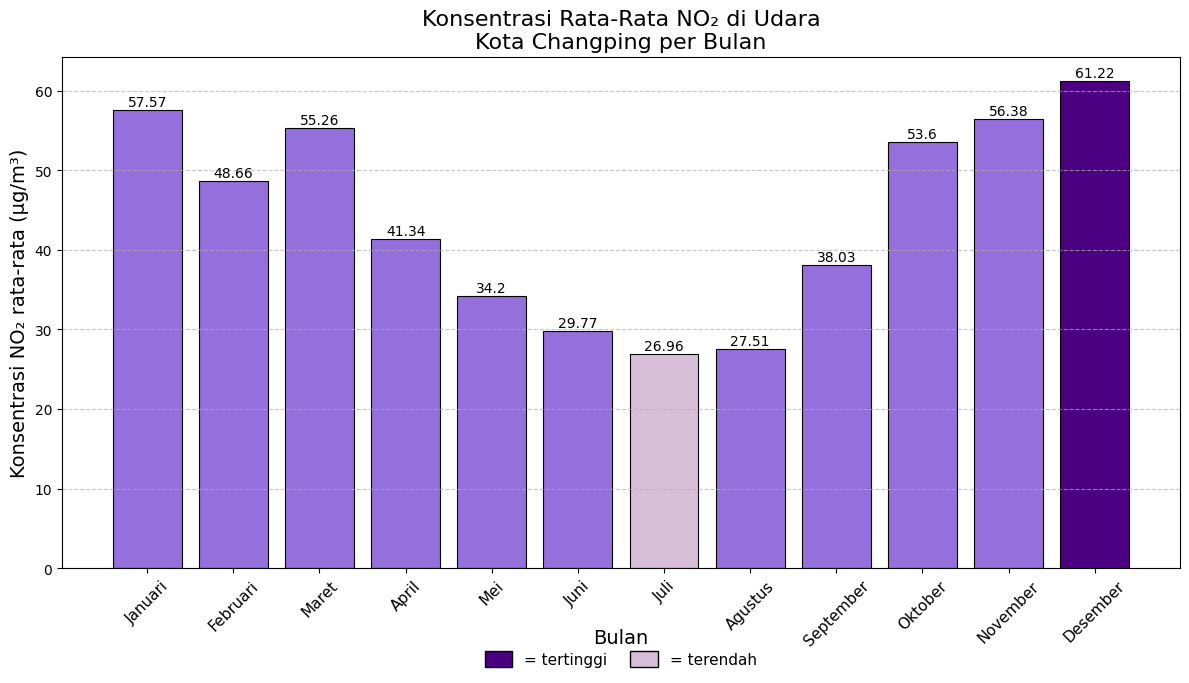

In [30]:
# Buat mapping angka ke nama bulan (dalam Bahasa Indonesia)
month_map = {
    1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April',
    5: 'Mei', 6: 'Juni', 7: 'Juli', 8: 'Agustus',
    9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'
}

# Ganti angka bulan dengan nama bulan
prsa_changping_df['month_name'] = prsa_changping_df['month'].map(month_map)

# Hitung rata-rata NO2 tiap bulan
monthly_no2 = prsa_changping_df.groupby('month_name')['NO2'].mean().round(2)

# Urutkan bulan sesuai urutan kalender
order = list(month_map.values())
monthly_no2 = monthly_no2.reindex(order)

# Temukan bulan dengan konsentrasi tertinggi dan terendah
max_month = monthly_no2.idxmax()
min_month = monthly_no2.idxmin()
max_val = monthly_no2.max()
min_val = monthly_no2.min()

# Plot
with plt.style.context('default'):
    # Tentukan warna batang
    colors = []
    for month in monthly_no2.index:
        if month == max_month:
            colors.append('#4B0082')  # ungu pekat (tertinggi)
        elif month == min_month:
            colors.append('#D8BFD8')  # ungu muda (terendah)
        else:
            colors.append('#9370DB')  # ungu sedang (lainnya)

    # Buat figure
    plt.figure(figsize=(12,7))
    bars = plt.bar(monthly_no2.index, monthly_no2.values, color=colors, edgecolor='black', linewidth=0.8)

    # Tambahkan label nilai di atas batang
    for i, val in enumerate(monthly_no2.values):
        plt.text(i, val + 0.5, f'{val}', ha='center', fontsize=10)

    # Label dan judul
    plt.xlabel('Bulan', fontsize=14, labelpad=-15)
    plt.ylabel('Konsentrasi NO₂ rata-rata (µg/m³)', fontsize=14)
    plt.title('Konsentrasi Rata-Rata NO₂ di Udara\nKota Changping per Bulan', fontsize=16)

    # Atur sumbu-x agar nama bulan horizontal
    plt.xticks(rotation=45, fontsize=11)

    # Aktifkan garis kartesius (grid)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.gca().set_facecolor('white')

    # Tambahkan legenda di bawah dengan jarak lebih besar
    legend_elements = [
        Patch(facecolor='#4B0082', edgecolor='black', label='= tertinggi'),
        Patch(facecolor='#D8BFD8', edgecolor='black', label='= terendah')
    ]
    plt.legend(
      handles=legend_elements,
      loc='lower center',
      bbox_to_anchor=(0.5, -0.22),
      ncol=2,
      frameon=False,
      fontsize=11,
      handlelength=1.8,
      handleheight=1.2,
      columnspacing=1.5
    )

    plt.tight_layout()
    plt.show()


### Pertanyaan 3: Pukul berapakah konsentrasi rata-rata NO2 tertinggi dan terendah di Kota Changping?

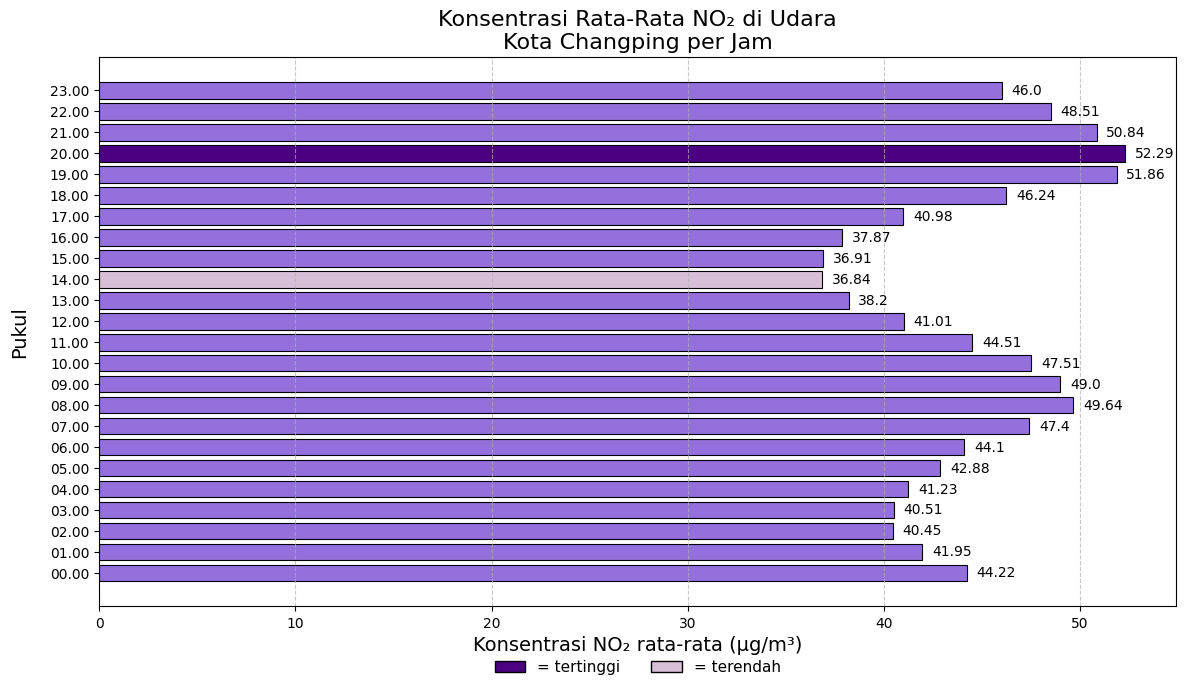

In [31]:
# Hitung rata-rata NO2 per jam
hourly_no2 = prsa_changping_df.groupby('hour')['NO2'].mean().round(2)

# Temukan jam dengan konsentrasi tertinggi dan terendah
max_hour = hourly_no2.idxmax()
min_hour = hourly_no2.idxmin()
max_val = hourly_no2.max()
min_val = hourly_no2.min()

# Ubah angka jam menjadi format 00.00, 01.00, dst.
hour_labels = [f"{int(h):02d}.00" for h in hourly_no2.index]

with plt.style.context('default'):
    # Tentukan warna batang
    colors = []
    for hour in hourly_no2.index:
        if hour == max_hour:
            colors.append('#4B0082')  # ungu pekat (tertinggi)
        elif hour == min_hour:
            colors.append('#D8BFD8')  # ungu muda (terendah)
        else:
            colors.append('#9370DB')  # ungu sedang (lainnya)

    # Buat figure
    plt.figure(figsize=(12,7))
    bars = plt.barh(hour_labels, hourly_no2.values, color=colors, edgecolor='black', linewidth=0.8)

    # Tambahkan label nilai di ujung batang
    for i, val in enumerate(hourly_no2.values):
        plt.text(val + 0.5, i, f'{val}', va='center', fontsize=10)

    # Label dan judul
    plt.xlabel('Konsentrasi NO₂ rata-rata (µg/m³)', fontsize=14)
    plt.ylabel('Pukul', fontsize=14, labelpad=15)
    plt.title('Konsentrasi Rata-Rata NO₂ di Udara\nKota Changping per Jam', fontsize=16)

    # Garis bantu horizontal
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.gca().set_facecolor('white')

    # Tambahkan legenda di bawah grafik
    legend_elements = [
        Patch(facecolor='#4B0082', edgecolor='black', label='= tertinggi'),
        Patch(facecolor='#D8BFD8', edgecolor='black', label='= terendah')
    ]
    plt.legend(
        handles=legend_elements,
        loc='lower center',
        bbox_to_anchor=(0.5, -0.15),
        ncol=2,
        frameon=False,
        fontsize=11
    )

    plt.tight_layout()
    plt.show()

### Pertanyaan 4: Apa faktor yang berkorelasi kuat dengan konsentrasi NO2 di Kota Changping?

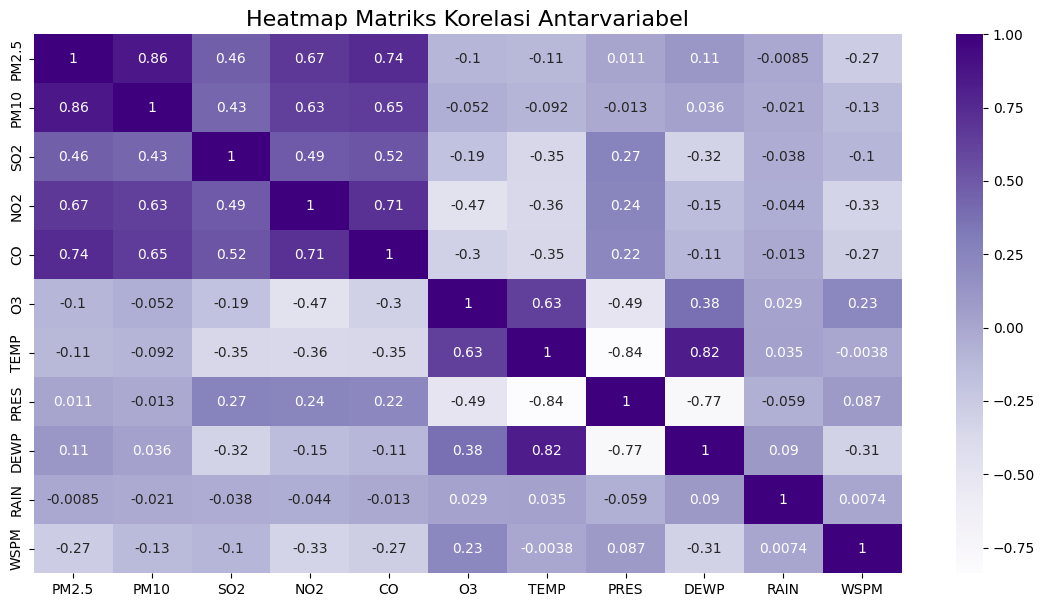

In [32]:
plt.figure(figsize=(14,7))

correlation_data = prsa_changping_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']]

sns.heatmap(correlation_data.corr(),cmap=plt.cm.Purples,annot=True)

plt.title('Heatmap Matriks Korelasi Antarvariabel',fontsize=16)
plt.show()

**Insight:**
- Bar Chart pertama menunjukkan rata-rata konsentrasi NO2 di udara di Kota Changping per tahun dari 2013 sampai 2017.
- Bar Chart kedua menunjukkan rata-rata konsentrasi NO2 di udara di Kota Changping per bulan.
- Bar Chart ketiga menunjukkan rata-rata konsentrasi NO2 di udara di Kota Changping per jam.
- Heatmap menunjukkan korelasi antarvariabel pada data.

## Analisis Lanjutan (Opsional)

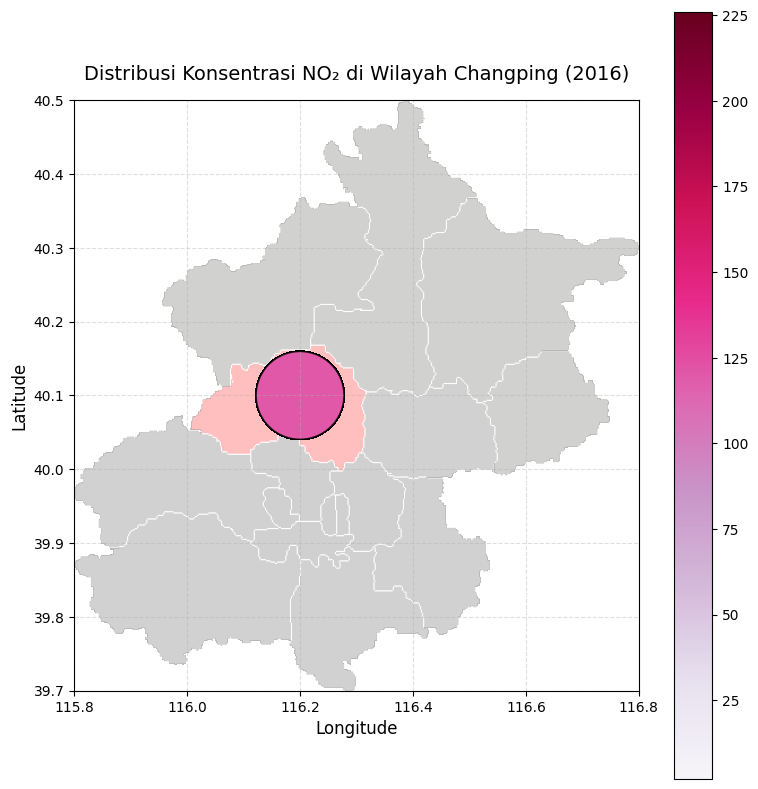

In [33]:
# Filter data untuk Changping tahun 2016
data_2016 = prsa_changping_df[prsa_changping_df['year'] == 2016].copy()

# Tambahkan koordinat geografis Changping (perkiraan pusat wilayah)
data_2016['latitude'] = 40.1
data_2016['longitude'] = 116.2

# Ubah ke GeoDataFrame
geometry = [Point(xy) for xy in zip(data_2016['longitude'], data_2016['latitude'])]
geo_df = gpd.GeoDataFrame(data_2016, geometry=geometry, crs="EPSG:4326")

# Baca gambar peta Changping
img = mpimg.imread('/content/Changping_map.png')

# Plot gambar sebagai latar
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img, extent=[115.8, 116.8, 39.7, 40.5], alpha=0.9)

# Plot data NO₂
geo_df.plot(
    ax=ax,
    column='NO2',
    legend=True,
    cmap='PuRd',   # 🟣 warna ungu
    markersize=4000,
    alpha=0.8,
    edgecolor='black'
)

# Kustomisasi plot
plt.title(
    'Distribusi Konsentrasi NO₂ di Wilayah Changping (2016)',
    fontsize=14,
    pad=15
)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



## Conclusion

- Conclution pertanyaan 1: Konsentrasi rata-rata NO2 tertinggi adalah pada tahun 2017 sebesar 51,01 µg/m³, sementara konsentrasi rata-rata NO2 terendah adalah pada tahun 2013 sebesar 40,96 µg/m³.
- Conclution pertanyaan 2: Konsentrasi rata-rata NO2 tertinggi adalah pada bulan Desember sebesar 61,22 µg/m³, sementara konsentrasi rata-rata NO2 terendah adalah pada bulan Juli sebesar 26,96 µg/m³.
- Conclution pertanyaan 3: Konsentrasi rata-rata NO2 tertinggi adalah pada pukul 20.00 sebesar 52,29 µg/m³, sementara konsentrasi rata-rata NO2 terendah adalah pada pukul 14.00 sebesar 36,84 µg/m³.
- Conclution pertanyaan 4: Berdasarkan heatmap, konsentrasi NO2 berkorelasi kuat dengan konsentrasi CO sebesar 0,71.








In [34]:
!pip freeze > requirements.txt